# Querying and Formatting Cellxgene Spatial Heart Datasets [doesn't work for the moment]
[Cellxgene Datasets](https://cellxgene.cziscience.com/datasets)<br>
[Cellxgene API Documentation](https://chanzuckerberg.github.io/cellxgene-census/index.html)

CZ CELLxGENE Discover: A single-cell data platform for scalable exploration, analysis and modeling of aggregated data CZI Single-Cell Biology, et al. bioRxiv 2023.10.30; doi: https://doi.org/10.1101/2023.10.30.563174
- Developed by: Christian Eger
- Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg
- Created on: 2402423
- Last modified: 240423

## Environment
**yaml path:** conda_environments/cellxgene-env.yml
```bash
mamba create -n cellxgene-env python=3.10
mamba activate cellxgene-env
pip install -U cellxgene-census
```

## Import modules

In [12]:
import cellxgene_census
import sys
import pandas as pd
from IPython.display import Image
sys.path.append('../tools/')
import utils

In [14]:
with cellxgene_census.open_soma(census_version="2023-12-15") as census:
    adata = cellxgene_census.get_anndata(
        census=census,
        organism="Homo sapiens",
        var_value_filter="feature_id in ['ENSG00000161798', 'ENSG00000188229']",
        obs_value_filter="cell_type == 'B cell' and tissue_general == 'lung' and disease == 'COVID-19' and is_primary_data == True",
        column_names={"obs": ["sex"]},
    )
adata

AnnData object with n_obs × n_vars = 2313 × 2
    obs: 'sex', 'cell_type', 'tissue_general', 'disease', 'is_primary_data'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'

## Filtering the dataset

### Creating a list of keys of interest

In [28]:
# This prints out a list of possible keys of interest to choose from
with cellxgene_census.open_soma(census_version="2023-12-15") as census:
    keys = list(census["census_data"]["homo_sapiens"].obs.keys())
keys

['soma_joinid',
 'dataset_id',
 'assay',
 'assay_ontology_term_id',
 'cell_type',
 'cell_type_ontology_term_id',
 'development_stage',
 'development_stage_ontology_term_id',
 'disease',
 'disease_ontology_term_id',
 'donor_id',
 'is_primary_data',
 'self_reported_ethnicity',
 'self_reported_ethnicity_ontology_term_id',
 'sex',
 'sex_ontology_term_id',
 'suspension_type',
 'tissue',
 'tissue_ontology_term_id',
 'tissue_general',
 'tissue_general_ontology_term_id',
 'raw_sum',
 'nnz',
 'raw_mean_nnz',
 'raw_variance_nnz',
 'n_measured_vars']

### Manually curating the list

In [3]:
keys = [
    'assay',
    'assay_ontology_term_id',
    'cell_type',
    'development_stage',
    'suspension_type',
    'disease',
    'sex',
    'tissue',
    'tissue_general',
]

### Printing out possible value_filters

In [4]:
values_dict = utils.get_value_filters(keys)

In [5]:
for k, v in values_dict.items():
    print(k, v, '\n')

assay ['Smart-seq v4', "10x 3' v3", "10x 3' v2", "10x 5' transcription profiling", "10x 5' v2", 'Smart-seq2', "10x 5' v1", 'Drop-seq', "10x 3' transcription profiling", 'Seq-Well', "10x 3' v1", 'MARS-seq', 'BD Rhapsody Whole Transcriptome Analysis', 'GEXSCOPE technology', 'inDrop', 'microwell-seq', 'STRT-seq', 'CEL-seq2', 'BD Rhapsody Targeted mRNA', 'sci-RNA-seq'] 

assay_ontology_term_id ['EFO:0700016', 'EFO:0009922', 'EFO:0009899', 'EFO:0030004', 'EFO:0009900', 'EFO:0008931', 'EFO:0011025', 'EFO:0008722', 'EFO:0030003', 'EFO:0008919', 'EFO:0009901', 'EFO:0008796', 'EFO:0700003', 'EFO:0700011', 'EFO:0008780', 'EFO:0030002', 'EFO:0008953', 'EFO:0010010', 'EFO:0700004', 'EFO:0010550'] 

cell_type ['oligodendrocyte', 'oligodendrocyte precursor cell', 'astrocyte of the cerebral cortex', 'microglial cell', 'cerebral cortex endothelial cell', 'vascular leptomeningeal cell', 'corticothalamic-projecting glutamatergic cortical neuron', 'L6b glutamatergic cortical neuron', 'near-projecting glu

### Spatial assay id according to [schema.md](https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/5.1.0/schema.md)

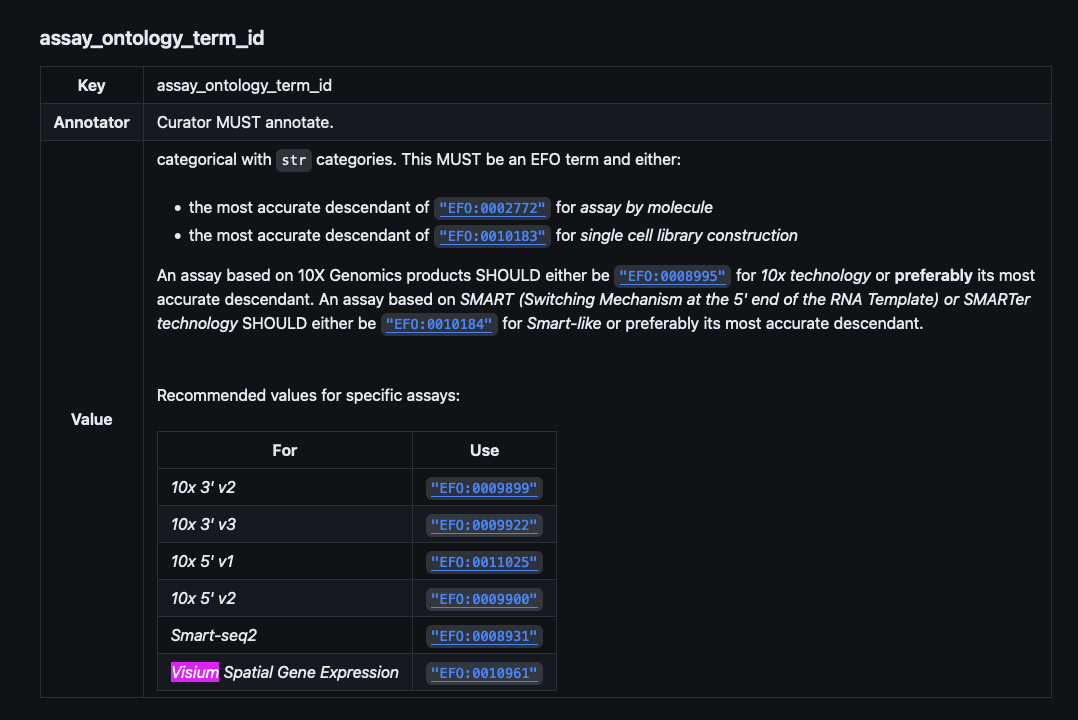

In [10]:
Image('image1.png')

In [8]:
with cellxgene_census.open_soma() as census:
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "assay_ontology_term_id == 'EFO:0010961'",
    )
    cell_metadata = cell_metadata.concat()
    cell_metadata = cell_metadata.to_pandas()
    print(cell_metadata)

The "stable" release is currently 2023-12-15. Specify 'census_version="2023-12-15"' in future calls to open_soma() to ensure data consistency.


Empty DataFrame
Columns: [soma_joinid, dataset_id, assay, assay_ontology_term_id, cell_type, cell_type_ontology_term_id, development_stage, development_stage_ontology_term_id, disease, disease_ontology_term_id, donor_id, is_primary_data, self_reported_ethnicity, self_reported_ethnicity_ontology_term_id, sex, sex_ontology_term_id, suspension_type, tissue, tissue_ontology_term_id, tissue_general, tissue_general_ontology_term_id, raw_sum, nnz, raw_mean_nnz, raw_variance_nnz, n_measured_vars]
Index: []

[0 rows x 26 columns]


For some reason theres no spatial technique under 'assay' but when using the [Dataset Browser](https://cellxgene.cziscience.com/datasets) there is?<br>
Turns out the api doesnt support it: https://github.com/chanzuckerberg/cellxgene-census/issues/723